In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# %load_ext rpy2.ipython

random_state = 1337

In [3]:
df = pd.read_csv('../../data/processed/protoss_2308_feb-08-2021_165940.csv', index_col=0)

drop_cols = ['player','frame','race']
df.drop(columns=drop_cols, inplace=True)

categorical_columns = df.columns[[t in ['object','bool'] for t in df.dtypes]]
continuous_columns = df.columns.difference(categorical_columns)

df.head()

,match_id,map_name,region,game_length,enemy_race,ap30s,second,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,1,World of Sleepers LE,us,437,T,0.0,0,12,12.0,15.0,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,1,World of Sleepers LE,us,437,T,310.8,30,13,14.0,15.0,50,727,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,1,World of Sleepers LE,us,437,T,366.8,60,15,16.0,23.0,115,867,125,1250,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,1,World of Sleepers LE,us,437,T,296.8,90,18,19.0,23.0,135,951,200,1475,0,0,12,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
4,1,World of Sleepers LE,us,437,T,305.2,120,19,20.0,23.0,65,895,600,1525,0,0,56,111,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False


In [4]:
matched_df = df.groupby(df['match_id']).head(1)
print('Number of matches in this dataframe:', len(matched_df))

Number of matches in this dataframe: 1945


In [5]:
maps = ['Eternal Empire LE', 'Ever Dream LE', 'Deathaura LE']
for enemy_race in ['P','T','Z']:
    for map_name in maps:
        print(len(matched_df[(matched_df.enemy_race == enemy_race) & (matched_df.map_name == map_name)]), enemy_race, map_name)

54 P Eternal Empire LE
44 P Ever Dream LE
41 P Deathaura LE
88 T Eternal Empire LE
83 T Ever Dream LE
56 T Deathaura LE
87 Z Eternal Empire LE
96 Z Ever Dream LE
52 Z Deathaura LE


In [6]:
indexed_df = matched_df[(matched_df.enemy_race == 'Z') & (matched_df.map_name == 'Ever Dream LE')]

In [7]:
match_indexes = indexed_df.match_id.index.to_list()
all_indexes = matched_df.match_id.index.to_list()

pvz_map_df = pd.DataFrame()
pvz_indexes = []

for i, match_index in enumerate(all_indexes):
    if match_index in match_indexes:
        pvz_indexes.append((match_index, all_indexes[i+1]))
        pvz_map_df = pvz_map_df.append(df.iloc[match_index:all_indexes[i+1],:])
        # print(match_index, all_indexes[i+1])

In [8]:
pvz_map_df.drop(columns=['enemy_race','map_name'], inplace=True)
pvz_map_df.head()

,match_id,region,game_length,ap30s,second,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
13534,696,kr,642,0.0,0,12,12.0,15.0,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
13535,696,kr,642,369.6,30,13,14.0,15.0,45,699,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
13536,696,kr,642,403.2,60,15,16.0,23.0,5,699,200,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
13537,696,kr,642,383.6,90,18,19.0,23.0,70,951,350,1400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True
13538,696,kr,642,406.0,120,19,20.0,23.0,338,979,275,1450,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True


In [9]:
test_length = int(len(pvz_indexes)*.2)
pvz_map_df_indexes = pvz_map_df.groupby(pvz_map_df['match_id']).head(1)
test_indexes = pvz_map_df_indexes.sample(test_length).match_id.index.to_list()

test_df = pd.DataFrame()
train_df = pd.DataFrame()
all_pvz_map_df_indexes = pvz_map_df_indexes.match_id.index.to_list()

for i, match_index in enumerate(all_pvz_map_df_indexes):
    match_index2 = all_indexes[all_indexes.index(match_index)+1]

    if match_index in test_indexes:
        test_df = test_df.append(pvz_map_df.loc[match_index:match_index2,:])
    else:
        train_df = train_df.append(pvz_map_df.loc[match_index:match_index2,:])

In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

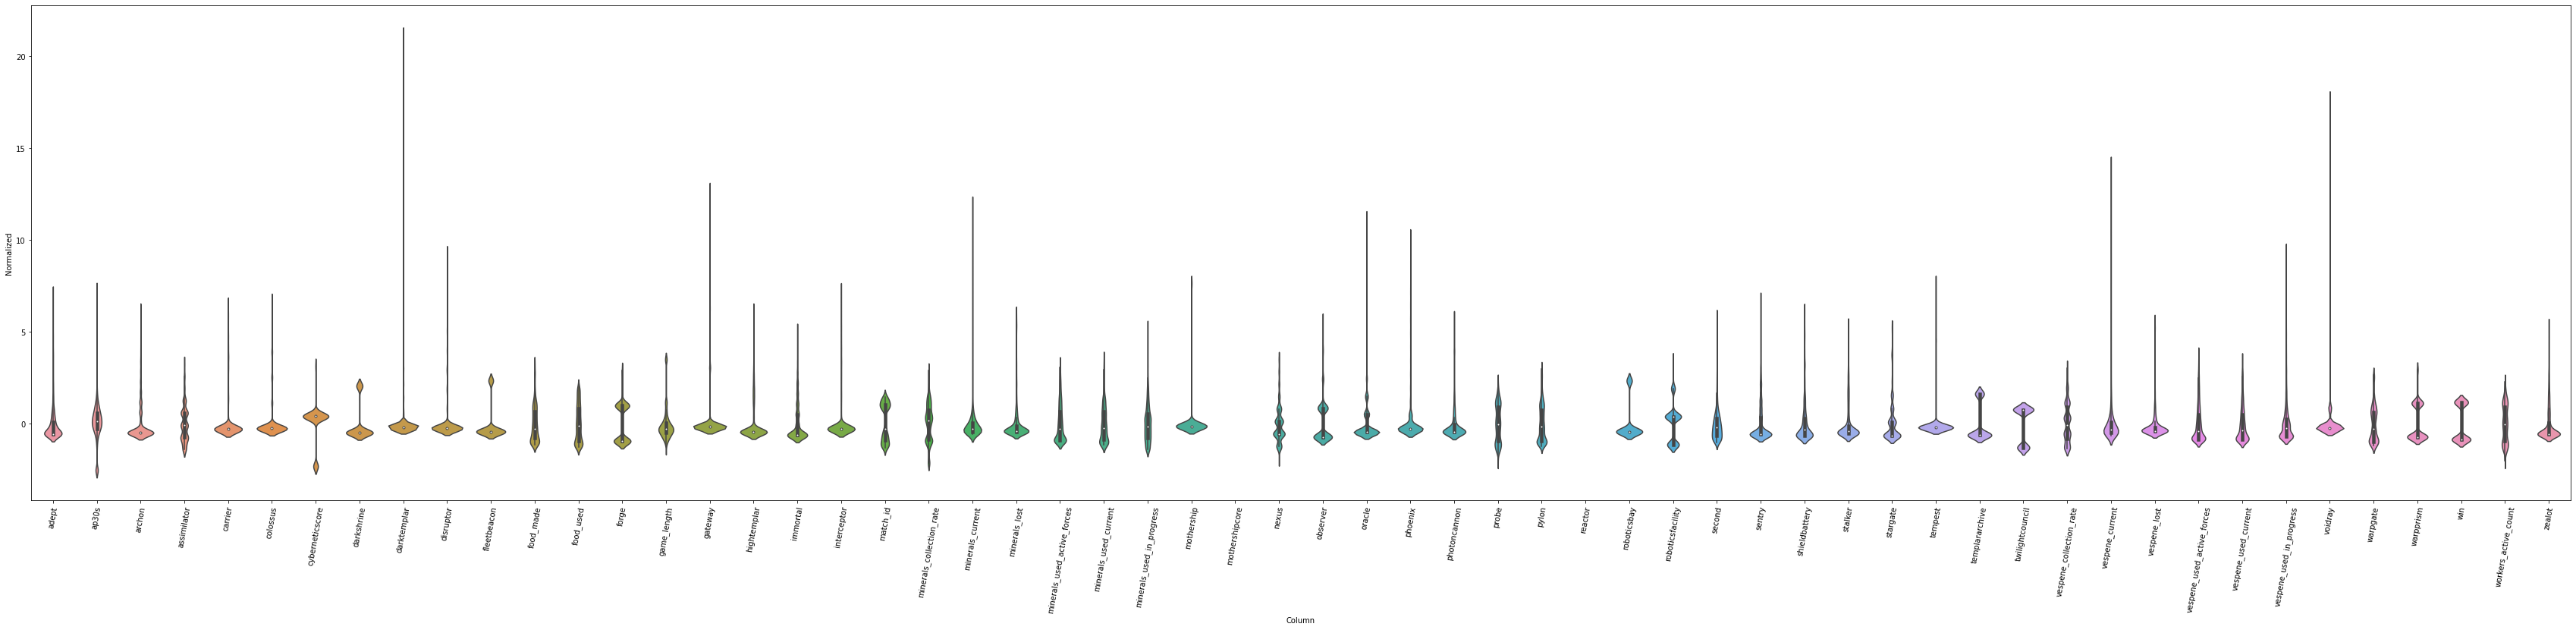

In [11]:
df_std = (pvz_map_df - train_mean) / train_std
df_std = df_std.loc[:,df_std.columns.difference(['region'])].melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(60, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(pvz_map_df.columns.difference(['region']), rotation=80)
plt.show()

In [12]:
counts = counter_df.probe.value_counts()
counts

NameError: name 'counter_df' is not defined

In [13]:
grouped_df = pvz_map_df.loc[:, ['match_id', 'game_length', 'region', 'win']]
grouped_df = grouped_df.groupby(grouped_df['match_id']).head(1)

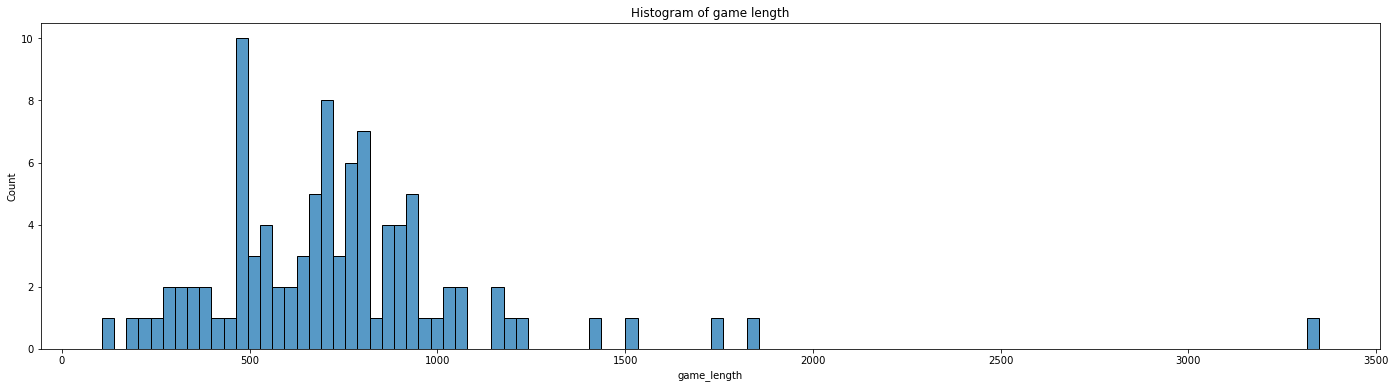

In [14]:
plt.figure(figsize=(24, 6))
ax = sns.histplot(data=grouped_df, x='game_length', bins=100)
plt.title('Histogram of game length')

plt.show()

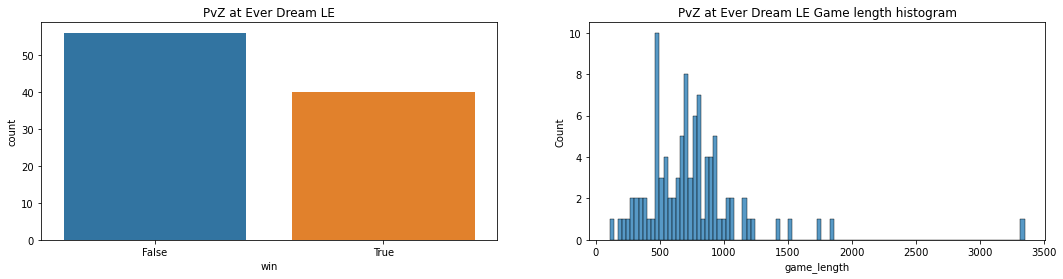

In [15]:
fig = plt.figure(figsize=(18,4))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('PvZ at Ever Dream LE')
ax = sns.countplot(data=grouped_df, x='win', ax=ax)

ax = fig.add_subplot(1,2,2)
ax.title.set_text('PvZ at Ever Dream LE Game length histogram')
sns.histplot(data=grouped_df, x='game_length', bins=100, ax=ax)

plt.show()

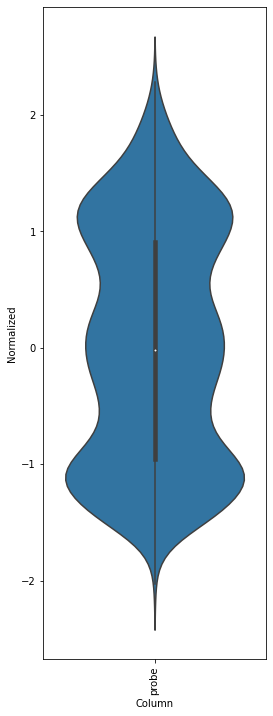

In [16]:
df_std = (pvz_map_df - train_mean) / train_std
df_std = df_std.loc[:,['probe']].melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(4, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(['probe'], rotation=90)
plt.show()

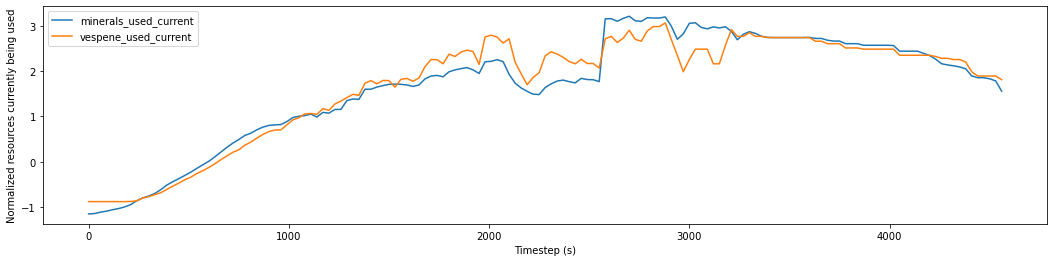

In [17]:
df_std = (pvz_map_df - train_mean) / train_std
df_std['second'] = pvz_map_df.second


plt.figure(figsize=(18,4))

plt.plot(pd.DataFrame(df_std[['second','minerals_used_current']].groupby(['second'])['minerals_used_current'].mean()), label='minerals_used_current')
plt.plot(pd.DataFrame(df_std[['second','vespene_used_current']].groupby(['second'])['vespene_used_current'].mean()), label='vespene_used_current')
plt.legend()
plt.ylabel('Normalized resources currently being used')
plt.xlabel('Timestep (s)')

plt.show()

In [28]:
df_std = (pvz_map_df - train_mean) / train_std
df_std['second'] = pvz_map_df.second
df_std['win'] = pvz_map_df.win

df_std.head()

,adept,ap30s,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,food_made,food_used,forge,game_length,gateway,hightemplar,immortal,interceptor,match_id,minerals_collection_rate,minerals_current,minerals_lost,minerals_used_active_forces,minerals_used_current,minerals_used_in_progress,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,region,roboticsbay,roboticsfacility,second,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,vespene_collection_rate,vespene_current,vespene_lost,vespene_used_active_forces,vespene_used_current,vespene_used_in_progress,voidray,warpgate,warpprism,win,workers_active_count,zealot
13534,-0.554576,-2.533007,-0.490475,-1.405243,-0.289262,-0.252743,-2.311758,-0.485037,-0.176915,-0.237386,-0.425192,-1.140854,-1.280267,-0.941276,-0.51743,-0.171343,-0.445136,-0.615107,-0.277162,-1.294941,-2.137644,-0.494230,-0.439106,-0.957505,-1.152450,-1.374781,-0.130732,NaN,-1.222239,-0.716251,-0.456897,-0.28657,-0.443362,-1.489900,-1.205842,NaN,NaN,-0.426416,-1.132355,0,-0.572327,-0.642613,-0.530693,-0.640531,-0.195349,-0.612782,-1.293716,-1.334552,-0.627242,-0.401404,-0.852469,-0.881359,-0.695961,-0.214436,-1.201263,-0.711436,True,-1.489900,-0.569394
13535,-0.554576,1.083671,-0.490475,-1.405243,-0.289262,-0.252743,-2.311758,-0.485037,-0.176915,-0.237386,-0.425192,-1.140854,-1.245173,-0.941276,-0.51743,-0.171343,-0.445136,-0.615107,-0.277162,-1.294941,-1.205653,-0.500430,-0.439106,-0.957505,-1.144541,-1.002256,-0.130732,NaN,-1.222239,-0.716251,-0.456897,-0.28657,-0.443362,-1.440941,-1.075126,NaN,NaN,-0.426416,-1.132355,30,-0.572327,-0.642613,-0.530693,-0.640531,-0.195349,-0.612782,-1.293716,-1.334552,-0.627242,-0.401404,-0.852469,-0.881359,-0.695961,-0.214436,-1.201263,-0.711436,True,-1.440941,-0.569394
13536,-0.554576,1.412460,-0.490475,-1.405243,-0.289262,-0.252743,-2.311758,-0.485037,-0.176915,-0.237386,-0.425192,-1.043577,-1.210080,0.988124,-0.51743,-0.171343,-0.445136,-0.615107,-0.277162,-1.294941,-1.205653,-0.550024,-0.439106,-0.957505,-1.112904,-0.878081,-0.130732,NaN,-1.222239,-0.716251,-0.456897,-0.28657,-0.443362,-1.343023,-1.075126,NaN,NaN,-0.426416,-1.132355,60,-0.572327,-0.642613,-0.530693,-0.640531,-0.195349,-0.612782,-1.293716,-1.334552,-0.627242,-0.401404,-0.852469,-0.881359,-0.695961,-0.214436,-1.201263,-0.711436,True,-1.343023,-0.569394
13537,-0.554576,1.220666,-0.490475,-1.405243,-0.289262,-0.252743,-2.311758,-0.485037,-0.176915,-0.237386,-0.425192,-1.043577,-1.157439,0.988124,-0.51743,-0.171343,-0.445136,-0.615107,-0.277162,-1.294941,-0.869656,-0.469433,-0.439106,-0.957505,-1.089176,-0.505556,-0.130732,NaN,-1.222239,-0.716251,-0.456897,-0.28657,-0.443362,-1.196145,-1.075126,NaN,NaN,-0.426416,-1.132355,90,-0.572327,-0.642613,-0.530693,-0.640531,-0.195349,-0.612782,-1.293716,-1.334552,-0.627242,-0.401404,-0.852469,-0.881359,-0.695961,-0.214436,-0.973613,-0.711436,True,-1.196145,-0.569394
13538,-0.554576,1.439859,-0.490475,-1.072013,-0.289262,-0.252743,-2.311758,-0.485037,-0.176915,-0.237386,-0.425192,-1.043577,-1.139892,-0.941276,-0.51743,-0.171343,-0.445136,-0.615107,-0.277162,-1.294941,-0.832323,-0.137152,-0.439106,-0.957505,-1.081267,-0.691818,-0.130732,NaN,-1.222239,-0.716251,-0.456897,-0.28657,-0.443362,-1.147186,-1.075126,NaN,NaN,-0.426416,-1.132355,120,-0.572327,-0.642613,-0.530693,-0.640531,-0.195349,-0.612782,-1.293716,-1.334552,-0.627242,-0.401404,-0.852469,-0.881359,-0.695961,-0.214436,-0.973613,-0.711436,True,-1.147186,-0.569394


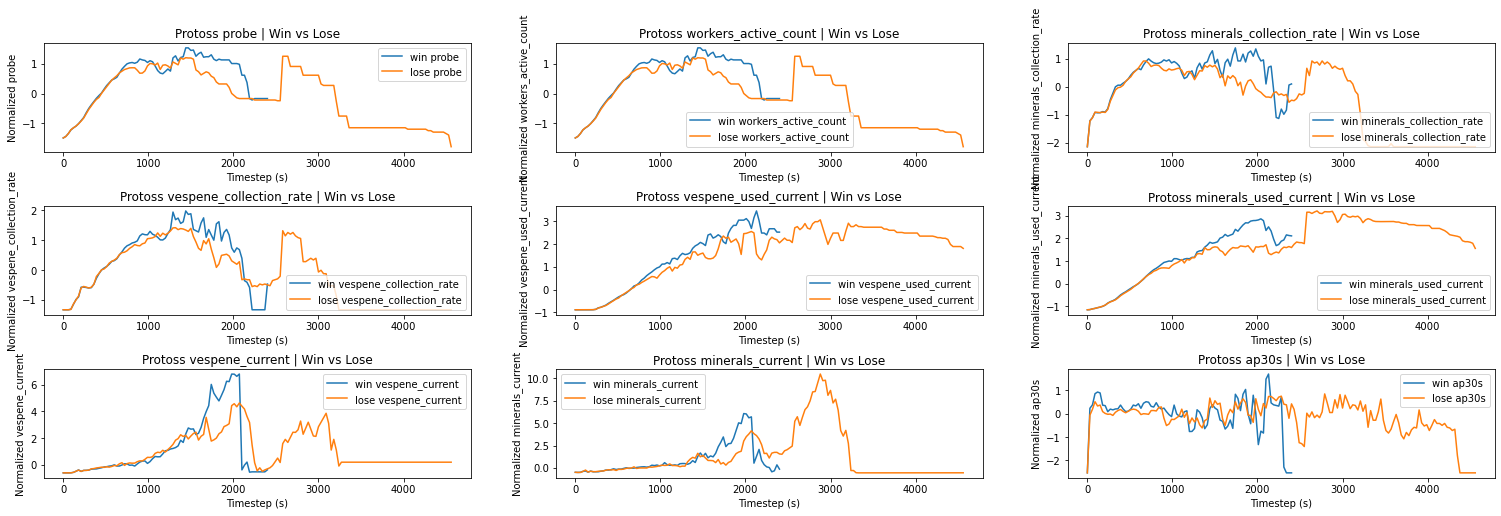

In [48]:
# row, col
shape = (3,3)
fig = plt.figure(figsize=(26,8))

for i, feature in enumerate(['probe','workers_active_count','minerals_collection_rate','vespene_collection_rate','vespene_used_current','minerals_used_current','vespene_current','minerals_current','ap30s']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('Protoss {} | Win vs Lose'.format(feature))
    plt.plot(pd.DataFrame(df_std[df_std.win == True][['second',feature]].groupby(['second'])[feature].mean()), label='win {}'.format(feature))
    plt.plot(pd.DataFrame(df_std[df_std.win == False][['second',feature]].groupby(['second'])[feature].mean()), label='lose {}'.format(feature))
    plt.ylabel('Normalized {}'.format(feature))
    plt.xlabel('Timestep (s)')
    ax.legend()


plt.subplots_adjust(hspace=.5)
plt.show()